In [16]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

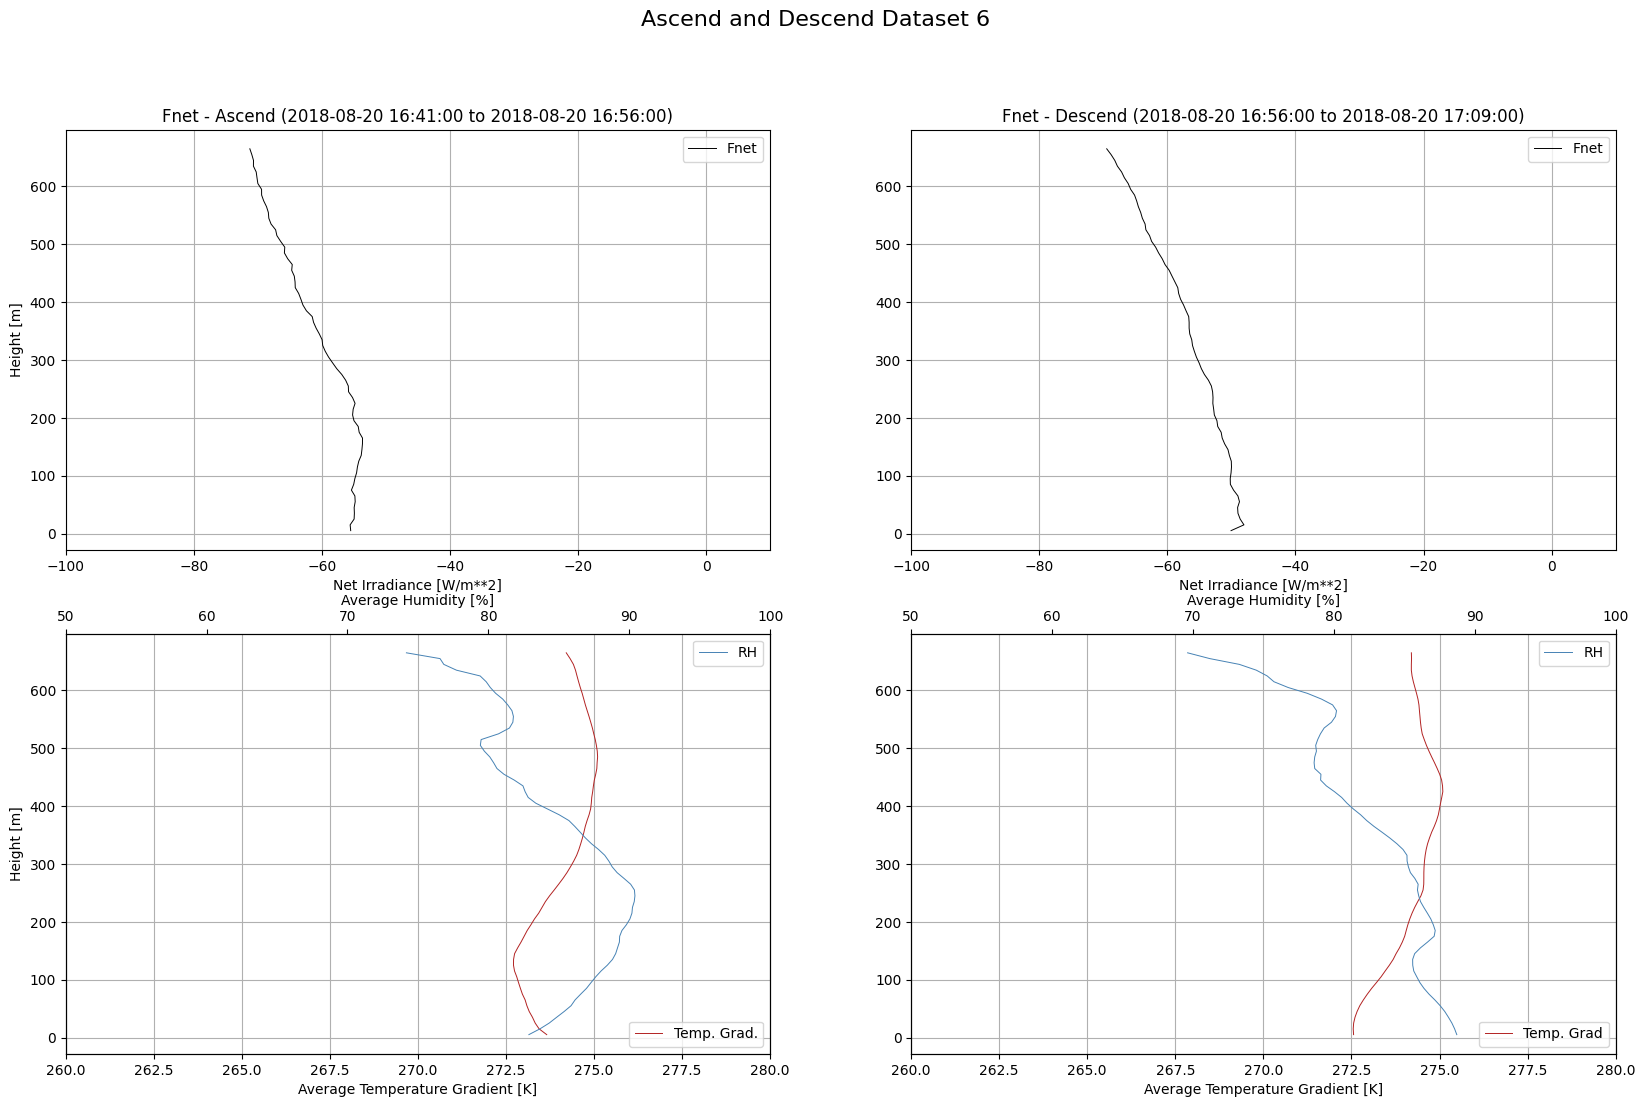

In [5]:
from asc_desc_working import process_data, calculate_and_plot

file_path_radiation_asc= 'data/4radiation_corr_ascend.csv'
file_path_radiation_desc = 'data/4radiation_corr_descend.csv'

calculate_and_plot(file_path_radiation_asc, file_path_radiation_desc)

In [6]:
data_asc = pd.read_csv(file_path_radiation_asc)
data_desc = pd.read_csv(file_path_radiation_desc)

df_asc = pd.DataFrame(data_asc)
df_desc = pd.DataFrame(data_desc)

In [7]:
df_asc.head(5)

,Date/Time,Latitude,Longitude,PPPP [hPa],TTT grad [K],RH [%],Height [m],Pitch [deg],Roll [deg],Yaw [deg],SWD [W/m**2] (raw),SWU [W/m**2] (raw),LWD [W/m**2] (raw),LWU [W/m**2] (raw),SWD [W/m**2] (corrected),SWU [W/m**2] (corrected),LWD [W/m**2] (corrected),LWU [W/m**2] (corrected),Flag
0,2018-08-20 16:41:00,89.62062,31.79224,1015.050,273.79,82.5,2.6,9.89,5.41,-26.95,119.11,80.19,258.08,315.00,114.99,80.60,258.09,314.67,0.0
1,2018-08-20 16:41:00,89.62062,31.79224,1015.050,273.79,82.5,2.6,9.81,5.67,-27.85,122.06,80.33,258.46,314.49,115.68,80.58,258.17,314.71,0.0
2,2018-08-20 16:41:00,89.62062,31.79224,1015.052,273.79,82.5,2.6,9.73,5.87,-28.70,118.72,80.19,258.36,314.58,116.42,80.53,258.25,314.77,0.0
3,2018-08-20 16:41:00,89.62062,31.79224,1015.028,273.78,82.5,2.8,9.58,6.06,-29.49,118.46,80.12,258.01,314.96,117.17,80.49,258.21,314.78,0.0
4,2018-08-20 16:41:00,89.62062,31.79225,1015.046,273.78,82.5,2.7,9.35,6.18,-30.16,119.83,80.19,257.78,314.80,117.87,80.45,258.23,314.80,0.0


In [8]:
df_desc.head(5)

,Date/Time,Latitude,Longitude,PPPP [hPa],TTT grad [K],RH [%],Height [m],Pitch [deg],Roll [deg],Yaw [deg],SWD [W/m**2] (raw),SWU [W/m**2] (raw),LWD [W/m**2] (raw),LWU [W/m**2] (raw),SWD [W/m**2] (corrected),SWU [W/m**2] (corrected),LWD [W/m**2] (corrected),LWU [W/m**2] (corrected),Flag
0,2018-08-20 16:56:00,89.61871,30.98255,931.662,274.28,69.1,679.9,5.54,5.35,-15.06,76.24,64.11,245.12,315.50,76.52,64.20,244.77,316.05,0.0
1,2018-08-20 16:56:00,89.61871,30.98257,931.687,274.28,69.1,679.7,5.32,5.40,-16.69,76.57,64.32,244.30,316.23,76.88,64.18,244.61,316.01,0.0
2,2018-08-20 16:56:00,89.61871,30.98258,931.723,274.29,69.1,679.4,5.12,5.43,-18.22,76.37,64.32,243.20,317.25,77.16,64.14,244.48,315.95,0.0
3,2018-08-20 16:56:00,89.61871,30.98260,931.706,274.28,69.1,679.5,5.39,5.70,-19.57,76.96,64.11,243.14,318.20,77.30,64.09,244.31,316.01,0.0
4,2018-08-20 16:56:00,89.61871,30.98261,931.717,274.29,69.1,679.5,5.21,5.75,-21.01,76.44,64.39,244.96,316.58,77.27,64.04,244.16,316.09,0.0


In [9]:

def split_dataframe_and_calculate(df, column_name='Height [m]', interval=10, asc=True):
    dfs = []
    start_index = 0
    current_max_height = interval
    desc_max_height = 0
    
    if not asc:
        desc_max_height = df.loc[0, column_name] - 10
    
    for index, row in df.iterrows():
        if asc:
            if row[column_name] > current_max_height:
                # Create a copy of the slice to avoid the warning
                slice_df = df.iloc[start_index:index].copy()
                # Directly modify the copy
                slice_df.loc[:, 'F_net'] = slice_df["LWD [W/m**2] (corrected)"] - slice_df["LWU [W/m**2] (corrected)"]
                dfs.append(slice_df)
                start_index = index
                current_max_height += interval
        else: 
            if row[column_name] < desc_max_height:
                # Create a copy of the slice to avoid the warning
                slice_df = df.iloc[start_index:index].copy()
                # Directly modify the copy
                slice_df.loc[:, 'F_net'] = slice_df["LWD [W/m**2] (corrected)"] - slice_df["LWU [W/m**2] (corrected)"]
                dfs.append(slice_df)
                start_index = index
                desc_max_height -= interval
            
    # Ensure the last slice is processed
    slice_df = df.iloc[start_index:].copy()
    slice_df.loc[:, 'F_net'] = slice_df["LWD [W/m**2] (corrected)"] - slice_df["LWU [W/m**2] (corrected)"]
    dfs.append(slice_df)
    
    return dfs

In [10]:
# Splitting the DataFrame and adding 'F_net' column
split_dfs_with_f_net_asc = split_dataframe_and_calculate(df_asc, asc=True)
split_dfs_with_f_net_desc = split_dataframe_and_calculate(data_desc, asc=False)

In [11]:
def generate_list(start_value, length, asc=True):
    if asc:
        return [round(start_value + i * 10,1) for i in range(length)]
    else: 
        return [round(start_value - i * 10,1) for i in range(length)]

In [12]:

def calc_mid_points(df, interval=10, asc=True):
    first_split_point = round(df[1].iloc[0]['Height [m]'], 1)
    
    if asc:
        init_height = round(first_split_point - interval, 1)
        mid_points = generate_list(init_height, len(df), asc=True)
    else:
        init_height = round(first_split_point + interval, 1)
        mid_points = generate_list(init_height, len(df), asc=False)
    return mid_points
    

In [23]:
def create_plot_fnet(dataframe, mean_scores, mid_points, direction,file_name):
    start_date = dataframe['Date/Time'].iloc[0]
    end_date = dataframe['Date/Time'].iloc[-1]

    plt.figure()  # Optional: Adjust the figure size
    plt.plot(mean_scores, mid_points, linestyle='-', color='black', linewidth=0.7)
    plt.title(f'Fnet - {direction} {start_date} to {end_date}')
    plt.ylabel('DataFrame Index')
    plt.xlabel('Mean F_net Score')
    plt.grid(True)  # Optional: Show grid for better readability
    plt.savefig('plots/' + file_name + '.png') 
    plt.show()


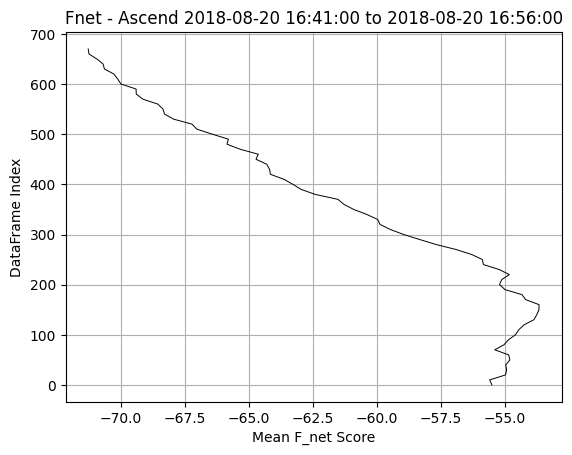

In [24]:
mean_scores_asc = [df['F_net'].mean() for df in split_dfs_with_f_net_asc]
mid_points_asc = calc_mid_points(split_dfs_with_f_net_asc, asc=True)

create_plot_fnet(dataframe=df_asc, 
                 mean_scores=mean_scores_asc, 
                 mid_points=mid_points_asc, 
                 direction='Ascend',
                file_name= 'F_net_asc')

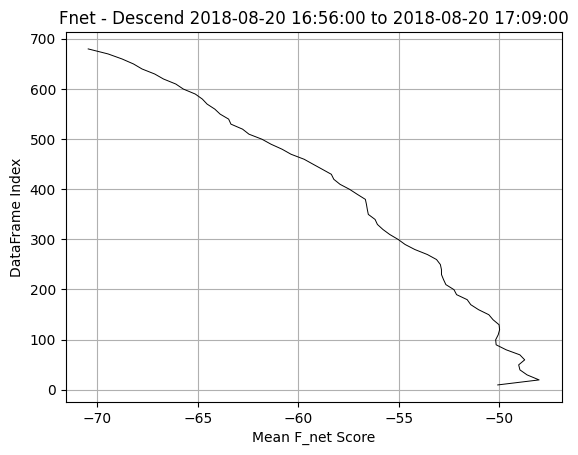

In [25]:
mean_scores_desc = [df['F_net'].mean() for df in split_dfs_with_f_net_desc]
mid_points_desc = calc_mid_points(split_dfs_with_f_net_desc, asc=False)

create_plot_fnet(dataframe=df_desc, 
                 mean_scores=mean_scores_desc,
                 mid_points=mid_points_desc, 
                 direction='Descend',file_name='F_net_desc')